#  Minecraft Machine Learning - the k-Nearest Neighbours Algorithm<br>

![Minecraft Steve and Creeper](data/msac.jpg)
<h1><center>Friend or foe?</center></h1>

This notebook will teach you how to create a k-Nearest Neighbours machine learning algorithm. First, we'll train the model on our images of the Minecraft mobs. Then, once the model has learned which mobs are hostile, neutral or passive, we'll test the model on some never-before seen images to see if it can tell its behaviour!

## k-Nearest Neighbours


Think about your best friend. Why do you like them? Are they funny, or kind, or athletic? Make a list in your head of all the qualities they have. Now think - do you share any of these qualities? Are **you** funny, or kind, or athletic? If you share a lot of qualities, you can think of them as your "Nearest Neighbour". The "k" in k-Nearest Neighbours is 1 in this case. If we thought about your two best friends, "k" would be 2. It simply means the number of neighbours.<br><br>Now, imagine a new kid moves to town who shares a lot of the qualities you and your friends have. Would you like to make friends with them? You might predict, "Yes! If they are like me and my best friend, we'll probably get on well". Now let's think about a similar situation for our machine learning model. If we can find some qualities that hostile Minecraft mobs share, we can look for those qualities in a new mob and predict if they're dangerous or not!


## Start here: How to use this notebook

Each box below contains some code we're going to run. We want to run each cell in order to make sure everything works. Try clicking on the box below. You should see a green outline appear around it. To run the code in the box, click the run button at the top of the page. Or, you can hold the shift key and press Enter. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
%matplotlib inline
print("All libraries Loaded!")

All libraries Loaded!


If you see the `All libraries loaded!` message below the box, you've done it correctly - well done! Don't worry too much about the code in the box. We use it to load some extra code that will be working behind the scenes to assist us. <br><br>Try running the code in the box below.

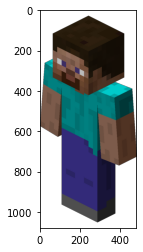

In [2]:
minecraft_steve = plt.imread("data/minecraft_steve.png") # this line loads a picture
plt.imshow(minecraft_steve) # this line shows the picture 

You should now see a picture of Steve. Note the sentences following the `#` symbols - we use this method to add handy notes which explain what is going on in a particular piece of code.

You're all set now! Let's get stuck in. Run each box of code in order. You can be sure it is a code box if you see `In [ ]:` to the left of the box. When you see `In [*]:` with the `*` in the brackets, it means the code is running. It might take a little bit of time to run all the code so don't worry if it's taking a long time!

## Who do I look most like? 

To compare images, we need to understand how the computer looks at them. Run the code box below.

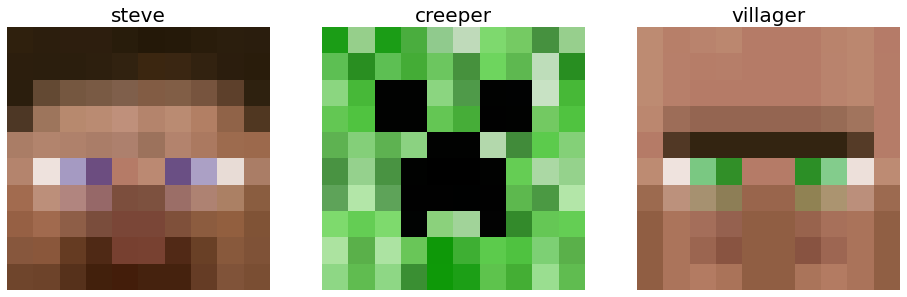

In [3]:
labels = ["steve", "creeper", "villager"] 
faces = [plt.imread("data/" + name + ".png") for name in labels]
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize = (16,16))
for ax, face, label in zip(fig.axes, faces, labels):
    ax.imshow(face)
    ax.axis('off')
    ax.set_title(label, fontsize=20)


You should now see 3 faces. Each face is made up of 100 individual coloured squares called "pixels". By combining green pixels and black pixels in a certain order, we can construct its face. Steve's face on the left is also made up of 100 pixels, but they are of different colours. <br><br>The third face on the right belongs to a villager. Do you think it is more similar to the creeper, or to Steve? You can probably guess, but can we help the computer to decide?<br><br>Well, each pixel has 3 numbers which tell us how strong the red, green and blue colours are for that individual pixel square. For example, the creeper has some really strong green pixel numbers, but almost zero red or blue pixel numbers. We can compare these numbers to determine how similar the images are!

In [4]:
diff_steve = np.sum(abs(faces[0] - faces[2])) 
diff_creeper = np.sum(abs(faces[1] - faces[2]))
nearest_neighbour = min(diff_steve, diff_creeper)

## Change to absolute statement for simplicity? "Nearest neighbour is Steve!"

print(f"Distance from Steve is {int(diff_steve)}. Distance from Creeper is {int(diff_creeper)}."
      f" Nearest neighbour is {labels[(diff_steve, diff_creeper).index(nearest_neighbour)].capitalize()}.")

## Maybe plot a steviness graph?

Distance from Steve is 64. Distance from Creeper is 83. Nearest neighbour is Steve.


All we have done here is subtract the pixel numbers of the villager from both Steve and the creeper. We then see that Steve is the nearest neighbour here. You could change the image of the villager to another picture and check to see if it's more Stevey or Creepy!<br><br>But instead of "Steveiness" and "Creepiness", we want our model to figure out whether a photo you give is contains a mob that is hostile, neutral or passive. And, instead of using three photos to decide, we're going to use the power of computers to test thousands! Let's load all of our images.

In [5]:
import cv2 as cv
from skimage.io import imread
from pathlib import Path

In [6]:
def load_image_files(container_path):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    
    train_img = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():

            img = plt.imread(file)
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            img_pred = cv.resize(img, dimension, interpolation=cv.INTER_AREA)
            img_pred = image.img_to_array(img_pred)
            img_pred = img_pred / 255
            train_img.append(img_pred)

    X = np.array(train_img)

    return X

In [7]:
load_image_files("../images")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '..\\images'

In [ ]:
from sklearn import datasets, neighbors, linear_model

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(max_iter=1000)

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

### Distance

k-Nearest Neighbours does not actually learn. It's more like if you wrote all the answers down for a test and looked at your page for the answers, instead of figuring out the answer on your own. If you want to see some code that learns and improves in accuracy, check out the "Hard Mode" tutorial!